# Example of an CNFT project analysis

## Library 

In [139]:
import pandas as pd
import seaborn as sns
from cardano_explorer import blockfrost_api

# Seaborn configuration
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

## Configure your [blockbfrost](https://blockfrost.io/) api key

In [63]:
cardano_mainnet = blockfrost_api.Auth(api_key='iSXrfNxhpPChKCnts2KX9MJ1eQ7exYgb')

## Get assets informations about the [Clay Nation by Clay Mates](https://www.claynation.io/) project

The Clay Nation have 10 000 assets, the request can take some time (approx. 1h).

In [66]:
# Clay Nation Policy Id
cn_policy_id = '40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c28262fab21728'

# Get the assets informations
cn_assets_info, _ = cardano_mainnet.assets_policy_informations(cn_policy_id, # Policy ID of the Clay Nation project
                                                               nb_of_results=None, # None for get all the assets informations
                                                               pandas=True) # Optional: Return a pandas dataframe 

The file has already been created, it is available in the following folder: **jupyter_notebooks/src/clay_nation.csv**

In [420]:
# Import the csv file
cn_assets_info = pd.read_csv('csv_files/clay_nation.csv', sep=';')
# Show the data
cn_assets_info.head(1)

,Unnamed: 0,asset,policy_id,asset_name,fingerprint,quantity,initial_mint_tx_hash,mint_or_burn_count,name,image,...,eyes,brows,mouth,Project,clothes,background,accessories,hats and hair,metadata,wings
0,0,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...,436c61794e6174696f6e37383939,asset1xkngd3y2njd3dzhfg25rtfp66gyvke6skqftxc,1,d7e089dce7c170f1af519fab710f9ed5d4d8680978035d...,1,Clay Nation #7899,ipfs://QmdXSPVnjRMsT2LuUMW5MMAKunwjpL34WDWjSy3...,...,Trippy Eyes,Blue Eyebrows,Grin,Clay Nation by Clay Mates,Tracksuit,Seafoam Green,Silver Chain,Clay Nation Hat & Mullet,NaN,NaN


## Exploratory Data Analysis

### Quick synthesis

In [421]:
print('Number of row       : ', cn_assets_info.shape[0])
print()
print('Number of columns   : ', cn_assets_info.shape[1])
print()
print('Features            : \n', cn_assets_info.columns.tolist())
print()
print('Missing values      : \n', cn_assets_info.isnull().sum())
print()
print('Unique values       : \n', cn_assets_info.nunique())
print()
print('Total missing values:', cn_assets_info.isnull().values.sum())

Number of row       :  10000

Number of columns   :  21

Features            : 
 ['Unnamed: 0', 'asset', 'policy_id', 'asset_name', 'fingerprint', 'quantity', 'initial_mint_tx_hash', 'mint_or_burn_count', 'name', 'image', 'body', 'eyes', 'brows', 'mouth', 'Project', 'clothes', 'background', 'accessories', 'hats and hair', 'metadata', 'wings']

Missing values      : 
 Unnamed: 0                  0
asset                       0
policy_id                   0
asset_name                  0
fingerprint                 0
quantity                    0
initial_mint_tx_hash        0
mint_or_burn_count          0
name                        0
image                       0
body                        0
eyes                        0
brows                       0
mouth                       0
Project                     0
clothes                     0
background                  0
accessories                 0
hats and hair               0
metadata                10000
wings                    9970


In [422]:
cn_assets_info.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.5,2886.89568,0.0,2499.75,4999.5,7499.25,9999.0
quantity,10000.0,1.0,0.00000,1.0,1.00,1.0,1.00,1.0
mint_or_burn_count,10000.0,1.0,0.00000,1.0,1.00,1.0,1.00,1.0
metadata,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre Processing

In [436]:
# Remove the unwanted columns
unwanted_columns = ['Unnamed: 0', 'metadata', 'asset',
                    'fingerprint', 'initial_mint_tx_hash', 'mint_or_burn_count']
p_cn_assets_info = cn_assets_info[[column_name for column_name in cn_assets_info if column_name not in unwanted_columns]].copy()

# Replace the missing value in the wings column attribute by the string 'no wings'
p_cn_assets_info['wings'] = cn_assets_info['wings'].fillna('no wings')

p_cn_assets_info = p_cn_assets_info.rename(columns={"hats and hair": "hats_and_hair"})

p_cn_assets_info.head(1)

,policy_id,asset_name,quantity,name,image,body,eyes,brows,mouth,Project,clothes,background,accessories,hats_and_hair,wings
0,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...,436c61794e6174696f6e37383939,1,Clay Nation #7899,ipfs://QmdXSPVnjRMsT2LuUMW5MMAKunwjpL34WDWjSy3...,Tan Clay,Trippy Eyes,Blue Eyebrows,Grin,Clay Nation by Clay Mates,Tracksuit,Seafoam Green,Silver Chain,Clay Nation Hat & Mullet,no wings


## Rarity Attribute

### Body Attribute 

body
Blue Clay      498
Brown Clay    3077
Green Clay     549
Tan Clay      2755
White Clay    3121
Name: quantity, dtype: int64

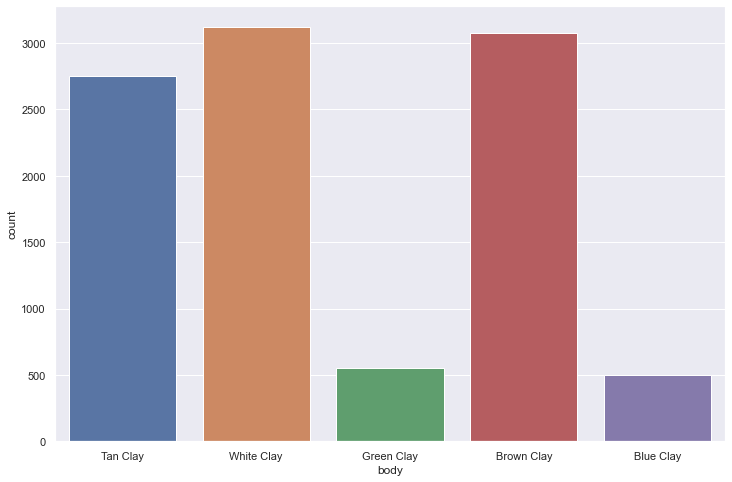

In [437]:
sns.countplot(x=p_cn_assets_info['body'])
p_cn_assets_info.groupby('body').count()['quantity']

### Eyes attribute

eyes
Ada Eyes          397
Angry Eyes        429
Big Eyes          847
Big Glasses       362
Crying eye        483
Eye Patch         464
Eye Sockets       391
Glasses           441
Laser Eyes        335
Lazy Eye          429
Love Glasses      383
Normal Eyes      1114
Red Evil Eyes     435
Sad Eyes          473
Small Eyes        854
Stoned Eyes       792
Sunglasses        466
Third Eye         465
Trippy Eyes       440
Name: quantity, dtype: int64

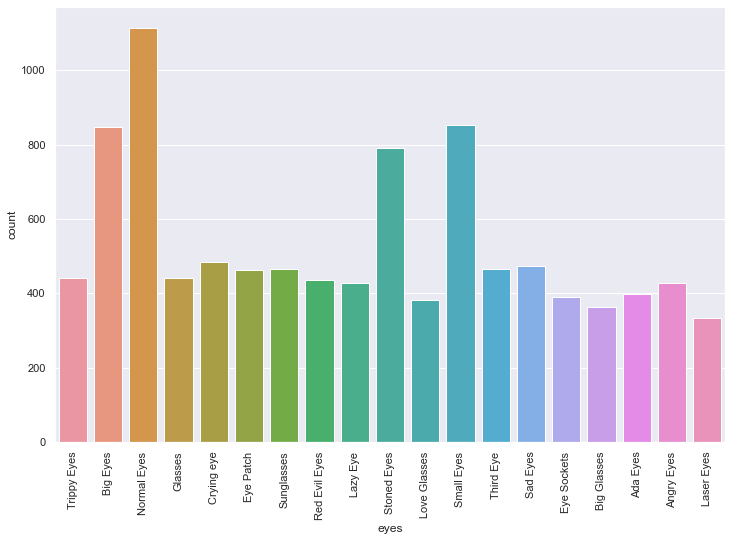

In [438]:
sns.countplot(x=p_cn_assets_info['eyes']).tick_params(axis='x', rotation=90)
p_cn_assets_info.groupby('eyes').count()['quantity']

### Brows attribute 

brows
Blue Eyebrows       1411
Monobrow            1437
Normal Eyebrows     4507
Pierced Eyebrows    1333
Shaved Eyebrows     1312
Name: quantity, dtype: int64

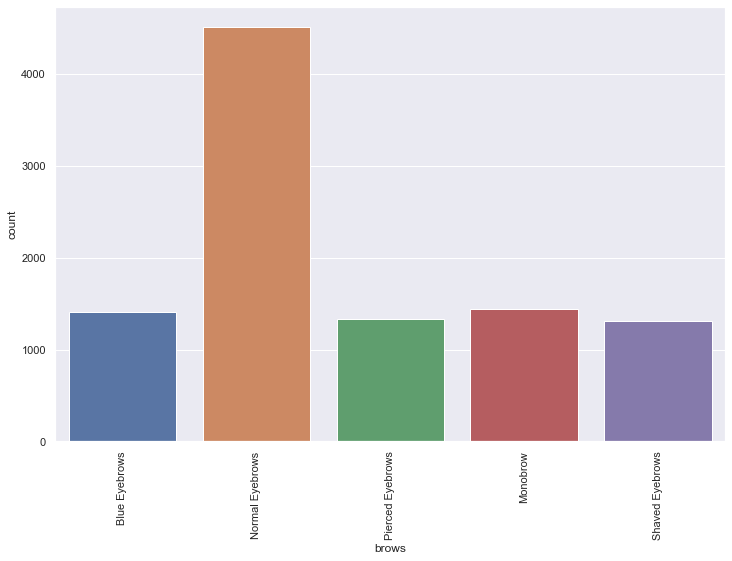

In [439]:
sns.countplot(x=p_cn_assets_info['brows']).tick_params(axis='x', rotation=90)
p_cn_assets_info.groupby('brows').count()['quantity']

### Month attribute

mouth
Cig                       429
Cig Mouth                 198
Duck                       89
Fly Tounge                370
Gold Tooth                636
Grin                     1113
Joint Mouth               260
Joint in Mouth            177
Joint in mouth            205
Missing Teeth             485
Normal Mouth             1346
Pipe                      445
Rose                      449
Rose in Mouth             180
Rubber Duck On Tounge     229
Rubber Duck on Tounge      95
Sad Face                  434
Screaming                 131
Screaming Mouth           190
Screaming mouth           134
Smile                    1047
Tounge                     80
Tounge Out                566
Vampire Mouth             385
Vampire Teeth             190
Wizard                    137
Name: quantity, dtype: int64

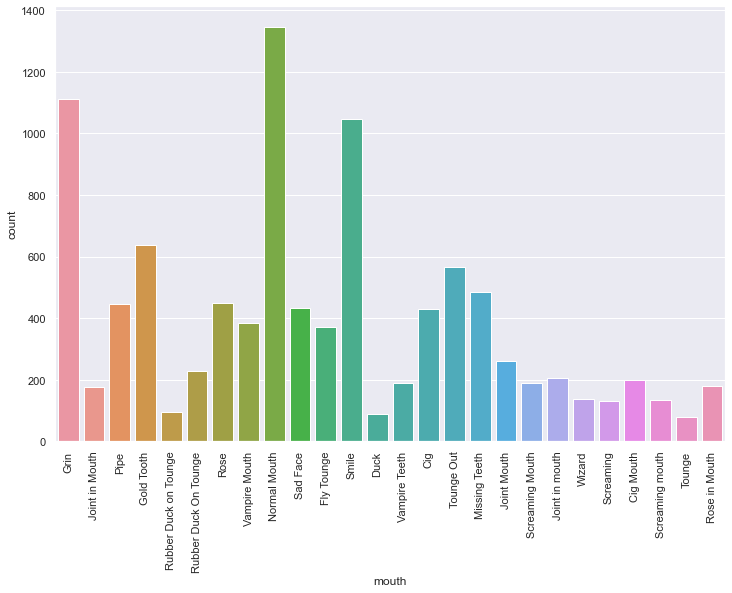

In [440]:
sns.countplot(x=p_cn_assets_info['mouth']).tick_params(axis='x', rotation=90)
p_cn_assets_info.groupby('mouth').count()['quantity']

### Clothes attribute

clothes
Armour                232
Blood Shirt           251
Bra                   481
Cardano Tshirt        278
Clay Nation Shirt     773
Hoodie                774
No Clothes            291
Orangutan              12
Peace Logo Shirt      487
Pink Fluffy Jacket    356
Punk Jacket           256
Rainbow Shirt         527
Robot Body            252
Spaceman Suit         210
Suit                  202
Super Hero            477
Tentacles             181
Tracksuit             204
Tshirt Green          849
Tshirt Grey           819
Tshirt Red            827
Unbuttoned Shirt      450
White Vest            811
Name: quantity, dtype: int64

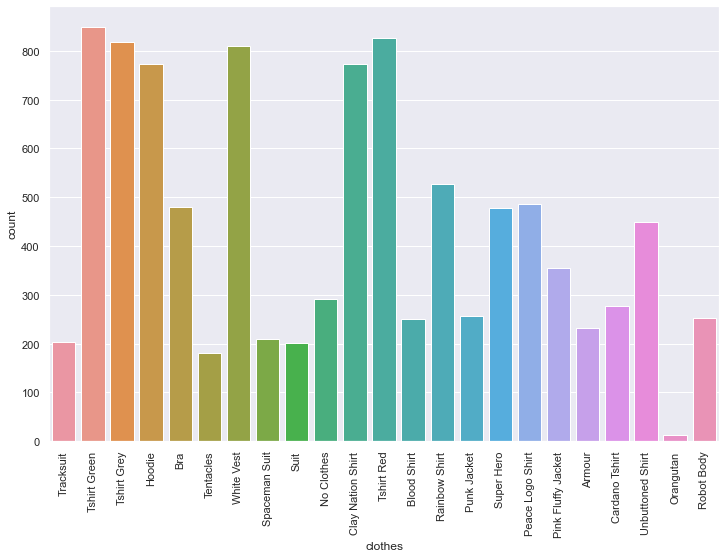

In [441]:
sns.countplot(x=p_cn_assets_info['clothes']).tick_params(axis='x', rotation=90)
p_cn_assets_info.groupby('clothes').count()['quantity']

### Background attribute

clothes
Armour                232
Blood Shirt           251
Bra                   481
Cardano Tshirt        278
Clay Nation Shirt     773
Hoodie                774
No Clothes            291
Orangutan              12
Peace Logo Shirt      487
Pink Fluffy Jacket    356
Punk Jacket           256
Rainbow Shirt         527
Robot Body            252
Spaceman Suit         210
Suit                  202
Super Hero            477
Tentacles             181
Tracksuit             204
Tshirt Green          849
Tshirt Grey           819
Tshirt Red            827
Unbuttoned Shirt      450
White Vest            811
Name: quantity, dtype: int64

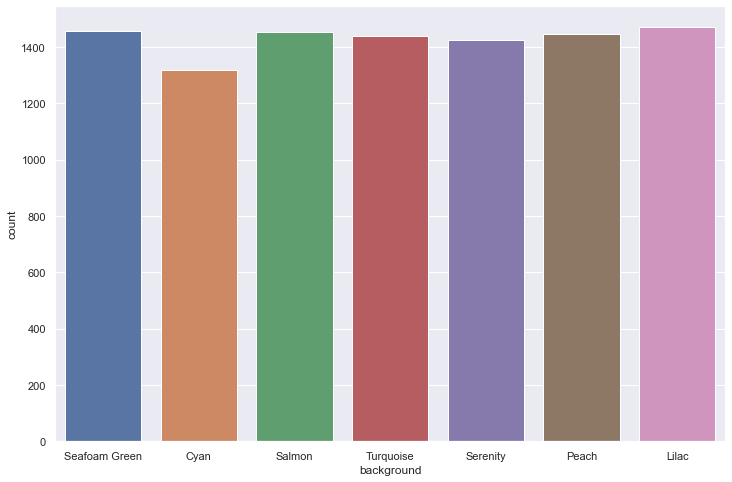

In [442]:
sns.countplot(x=p_cn_assets_info['background'])
p_cn_assets_info.groupby('clothes').count()['quantity']

### Accessories attribute

accessories
Bowtie               709
ClayPods            1184
Dog Collar           306
EarWax               651
Flies                433
Flower Necklace     1034
Frog                 371
Gold Chain           790
Hearts               363
Mushroom Earings     577
No Accessories      1320
Parrot               391
Silver Chain        1184
Spider               687
Name: quantity, dtype: int64

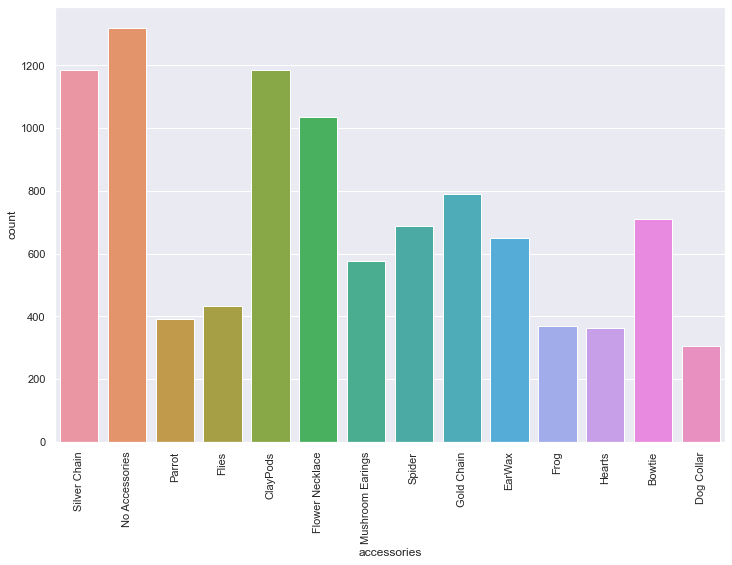

In [443]:
sns.countplot(x=p_cn_assets_info['accessories']).tick_params(axis='x', rotation=90)
p_cn_assets_info.groupby('accessories').count()['quantity']

### Hats And Aair attribute

hats_and_hair
Alien Antennae                       124
Alien Antennae & Long Hair            95
Bald                                 195
Beanie                               334
Beanie & Brown Mullet                122
Beanie & Mullet                      108
Black Fringe                         331
Black Mullet                         124
Blue Fringe                          147
Blue Mohawk                          168
Brown Bob                            314
Brown Fringe                         360
Brown Long Hair                      125
Brown Mullet                         120
Bucket Hat                           334
Bucket Hat & Brown Long Hair         104
Bucket Hat & Long Hair               115
Bull Horns                           143
Bull Horns & Brown Mullet            121
Bull Horns & Mullet                  109
Cat Hat                              366
Clay Nation Cap                      319
Clay Nation Hat & Brown Long Hair    107
Clay Nation Hat & Long Hair           87
Cl

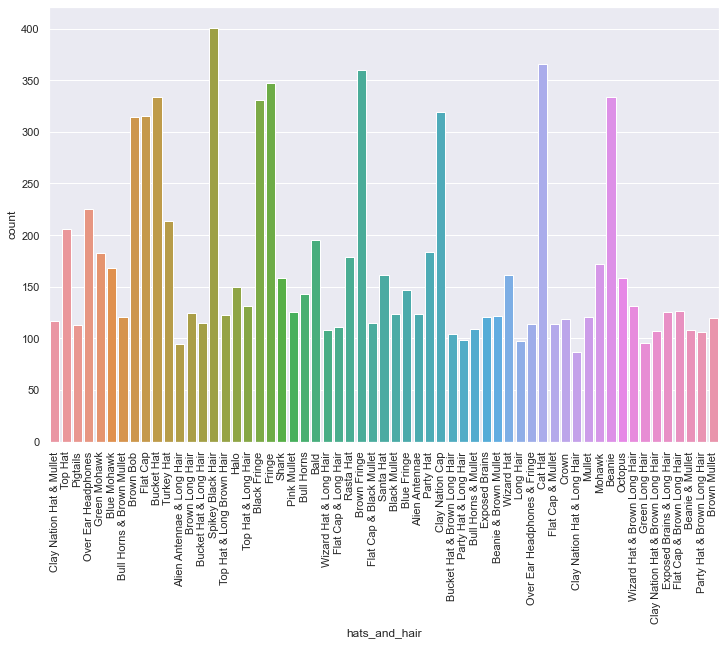

In [444]:
sns.countplot(x=p_cn_assets_info['hats_and_hair']).tick_params(axis='x', rotation=90)
p_cn_assets_info.groupby('hats_and_hair').count()['quantity']

#### Wings attribute

wings
Angel wings      30
no wings       9970
Name: quantity, dtype: int64

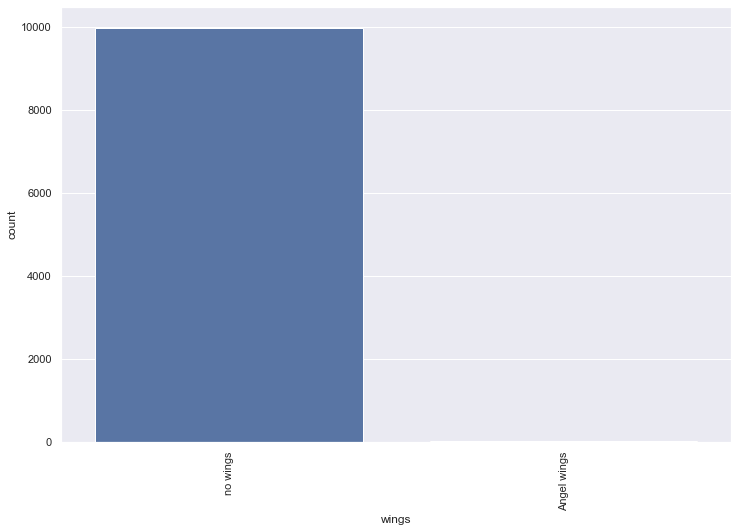

In [445]:
sns.countplot(x=p_cn_assets_info['wings']).tick_params(axis='x', rotation=90)
p_cn_assets_info.groupby('wings').count()['quantity']

## Unofficial Clay Nation Ranking

### Calculate rarity insights

In [446]:
def attr_freq_in_percent(attr_value_count):
    '''Calculate the frequency of the attribute in percentage'''
    percentage = (100 * attr_value_count) / nb_of_assets
    return round(percentage, 2)

def rarity_insights(attribute_name, attr_freq_count, attr_freq_perc):
    '''Add insights to the assest attribute'''
    return '{}: {} / {} ({}%)'.format(attribute_name, attr_freq_count, nb_of_assets, attr_freq_perc)

# Clay Nation attributes
attributes = ['body', 'eyes', 'brows', 'mouth', 'clothes', 'background', 'accessories', 'hats_and_hair', 'wings']

# Create a new dataframe
ranking_cn_assets = p_cn_assets_info.copy()

# Total of assets minted and burn
nb_of_assets = len(ranking_cn_assets)

# Create column with rarity indicators for each attribute
for attribute in attributes:
    
    # New column names to add to the dataframe
    freq_count_col_name = "{}_freq_count".format(attribute)
    freq_pct_col_name = "{}_freq_pct".format(attribute)
    ration_col_name = "{}_ratio".format(attribute)
    
    # Count the frequency of the attribute
    ranking_cn_assets[freq_count_col_name] = ranking_cn_assets.groupby(attribute)[attribute].transform('count').tolist()
    
    # Calculate the frequency of the attribute in percentage 
    attr_freq_pct = ranking_cn_assets[freq_count_col_name].apply(attr_freq_in_percent)
    ranking_cn_assets[freq_pct_col_name] = attr_freq_pct 
    
    # Calculate the ration of each attribute
    ranking_cn_assets[ration_col_name] = round(attr_freq_pct / 100, 4)

# Add a column with the sum of the ration of each attribute of each assets
ranking_cn_assets['sum_ratio_attr'] = ranking_cn_assets[[column_name for column_name in ranking_cn_assets.columns if 'ratio' in column_name]].sum(axis = 1)

# Add the rarity insights for each attribute of each assets
ranking_cn_assets['body'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.body, x.body_freq_count, x.body_freq_pct), axis=1)
ranking_cn_assets['eyes'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.eyes, x.eyes_freq_count, x.eyes_freq_pct), axis=1)
ranking_cn_assets['brows'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.brows, x.brows_freq_count, x.brows_freq_pct), axis=1)
ranking_cn_assets['clothes'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.clothes, x.clothes_freq_count, x.clothes_freq_pct), axis=1)
ranking_cn_assets['mouth'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.mouth, x.mouth_freq_count, x.mouth_freq_pct), axis=1)
ranking_cn_assets['background'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.background, x.background_freq_count, x.background_freq_pct), axis=1)
ranking_cn_assets['accessories'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.accessories, x.accessories_freq_count, x.accessories_freq_pct), axis=1)
ranking_cn_assets['hats_and_hair'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.hats_and_hair, x.hats_and_hair_freq_count, x.hats_and_hair_freq_pct), axis=1)
ranking_cn_assets['wings'] = ranking_cn_assets.apply(lambda x: rarity_insights(x.wings, x.wings_freq_count, x.wings_freq_pct), axis=1)

### Ranking 
The lower the sum of the ratio, the rarer the asset.

In [450]:
# Sort the values of the columns 'sum_ratio_attr'
ranking_cn_assets = ranking_cn_assets.sort_values(by=['sum_ratio_attr'])

# Add a column with the ranking number
ranking_cn_assets['ranking'] = ['#{}'.format(i) for i in range(1, nb_of_assets+1)]

wanted_columns = ['name','ranking','sum_ratio_attr', 'body',
                  'eyes', 'brows', 'mouth', 'clothes',
                  'background', 'accessories', 'hats_and_hair', 'wings',
                  'image', 'asset_name', 'policy_id']

# Save the file
ranking_cn_assets[wanted_columns].to_csv('csv_files/clay_nation_ranking.csv', index=False)

In [453]:
# Import the Clay Nation Ranking file
clay_nation_ranking = pd.read_csv('csv_files/clay_nation_ranking.csv')

# Show the top 10 rarity Clay Nation
clay_nation_ranking.head(10)

,name,ranking,sum_ratio_attr,body,eyes,brows,mouth,clothes,background,accessories,hats_and_hair,wings,image,asset_name,policy_id
0,Clay Nation #7279,#1,0.4982,Blue Clay: 498 / 10000 (4.98%),Red Evil Eyes: 435 / 10000 (4.35%),Blue Eyebrows: 1411 / 10000 (14.11%),Sad Face: 434 / 10000 (4.34%),Robot Body: 252 / 10000 (2.52%),Peach: 1444 / 10000 (14.44%),Dog Collar: 306 / 10000 (3.06%),Mohawk: 172 / 10000 (1.72%),Angel wings: 30 / 10000 (0.3%),ipfs://QmUqQhwLaR4qZf6SqD3uxy6kUTmDCwYJDMENkvH...,436c61794e6174696f6e37323739,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...
1,Clay Nation #0057,#2,0.5912,Green Clay: 549 / 10000 (5.49%),Lazy Eye: 429 / 10000 (4.29%),Monobrow: 1437 / 10000 (14.37%),Rubber Duck On Tounge: 229 / 10000 (2.29%),White Vest: 811 / 10000 (8.11%),Serenity: 1423 / 10000 (14.23%),Gold Chain: 790 / 10000 (7.9%),Turkey Hat: 214 / 10000 (2.14%),Angel wings: 30 / 10000 (0.3%),ipfs://QmatbELAAoZQ8hZrX8KpWshphPc42rYLSMVVAGc...,436c61794e6174696f6e3537,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...
2,Clay Nation #1984,#3,0.6147,Blue Clay: 498 / 10000 (4.98%),Big Eyes: 847 / 10000 (8.47%),Blue Eyebrows: 1411 / 10000 (14.11%),Joint Mouth: 260 / 10000 (2.6%),Tshirt Grey: 819 / 10000 (8.19%),Serenity: 1423 / 10000 (14.23%),Spider: 687 / 10000 (6.87%),Mohawk: 172 / 10000 (1.72%),Angel wings: 30 / 10000 (0.3%),ipfs://QmNd5THQX9HfPKeRz69EoGDySdYH5YVBoYEjTA2...,436c61794e6174696f6e31393834,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...
3,Clay Nation #1708,#4,0.6921,Tan Clay: 2755 / 10000 (27.55%),Lazy Eye: 429 / 10000 (4.29%),Pierced Eyebrows: 1333 / 10000 (13.33%),Duck: 89 / 10000 (0.89%),No Clothes: 291 / 10000 (2.91%),Peach: 1444 / 10000 (14.44%),Frog: 371 / 10000 (3.71%),Rasta Hat: 179 / 10000 (1.79%),Angel wings: 30 / 10000 (0.3%),ipfs://QmRNG2NqzZf7Hn2ZXhpsYYgYMwqus3ies8eXhWv...,436c61794e6174696f6e31373038,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...
4,Clay Nation #1153,#5,0.7758,Tan Clay: 2755 / 10000 (27.55%),Eye Sockets: 391 / 10000 (3.91%),Blue Eyebrows: 1411 / 10000 (14.11%),Rose: 449 / 10000 (4.49%),Tshirt Grey: 819 / 10000 (8.19%),Serenity: 1423 / 10000 (14.23%),Hearts: 363 / 10000 (3.63%),Clay Nation Hat & Mullet: 117 / 10000 (1.17%),Angel wings: 30 / 10000 (0.3%),ipfs://QmRwiSN78o9wmNTqnpn9ScCLDYZ9dXcNqkxzaR3...,436c61794e6174696f6e31313533,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...
5,Clay Nation #9950,#6,0.7814,White Clay: 3121 / 10000 (31.21%),Big Eyes: 847 / 10000 (8.47%),Shaved Eyebrows: 1312 / 10000 (13.12%),Vampire Teeth: 190 / 10000 (1.9%),Cardano Tshirt: 278 / 10000 (2.78%),Seafoam Green: 1456 / 10000 (14.56%),Flies: 433 / 10000 (4.33%),Blue Fringe: 147 / 10000 (1.47%),Angel wings: 30 / 10000 (0.3%),ipfs://QmPzGm1vR15UwC7pmJKP3FdboxDQ5yC7RBxR6jv...,436c61794e6174696f6e39393530,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...
6,Clay Nation #6240,#7,0.7919,Brown Clay: 3077 / 10000 (30.77%),Angry Eyes: 429 / 10000 (4.29%),Monobrow: 1437 / 10000 (14.37%),Joint in mouth: 205 / 10000 (2.05%),Rainbow Shirt: 527 / 10000 (5.27%),Turquoise: 1439 / 10000 (14.39%),EarWax: 651 / 10000 (6.51%),Alien Antennae: 124 / 10000 (1.24%),Angel wings: 30 / 10000 (0.3%),ipfs://QmXxmcX55oiDtit6rNBpFPXD2qXGAJN9bBiiNEi...,436c61794e6174696f6e36323430,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...
7,Clay Nation #2911,#8,0.8175,Tan Clay: 2755 / 10000 (27.55%),Small Eyes: 854 / 10000 (8.54%),Pierced Eyebrows: 1333 / 10000 (13.33%),Pipe: 445 / 10000 (4.45%),Rainbow Shirt: 527 / 10000 (5.27%),Cyan: 1316 / 10000 (13.16%),Bowtie: 709 / 10000 (7.09%),Top Hat: 206 / 10000 (2.06%),Angel wings: 30 / 10000 (0.3%),ipfs://QmT6AgEJsHBh8AtSgKYWDgsTmS9Xsyq7VGaMxH1...,436c61794e6174696f6e32393131,40fa2aa67258b4ce7b5782f74831d46a84c59a0ff0c282...
8,Clay Nation #1736,#9,0.8242,Tan Clay: 2755 / 10000 (27.55%),Lazy Eye: 429 / 10000 (4.29%),Shaved Eyebrows: 1312 / 10000 (13.12%),Cig: 429 / 10000 (4.29%),Pink Fluffy Jacket: 356 / 10000 (3.56%),Turquoise: 1439 / 10000 (14.39%),No Accessories: 1320 / 10000 (13.2%),Mohawk: 172 / 10000 (1